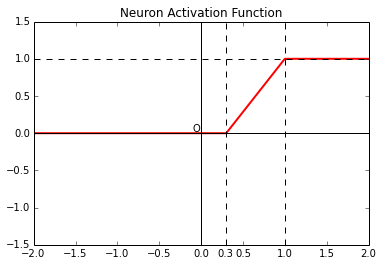

In [26]:
%matplotlib inline
import numpy as np;
import matplotlib.pyplot as plt;

### chart #1
alpha = 0.3;
def g_pos(x):
    return min(1, max(0, (x-alpha)/(1-alpha)));
x = np.array([-2,0.3,1,2]);
y = np.zeros(4);
for i in xrange(1, 4):
    y[i] = g_pos(x[i]);
plt.plot(x,y,'r-',linewidth=2);
x=[0,0,0];
y=[-1.5,0,1.5];
plt.plot(x,y,'k-');
x=[1,1,1];
y=[-1.5,0,1.5];
plt.plot(x,y,'k--');
y=[0,0,0];
x=[-2.0,0,2.0];
plt.plot(x,y,'k-');
y=[1,1,1];
x=[-2.0,0,2.0];
plt.plot(x,y,'k--');
x=[0.3,0.3,0.3];
y=[-1.5,0,1.5];
plt.plot(x,y,'k--');
plt.axis([-2,2,-1.5,1.5]);
plt.title("Neuron Activation Function");
plt.text(0.2,-1.65,'0.3')
plt.text(-0.1,0.03,'O')

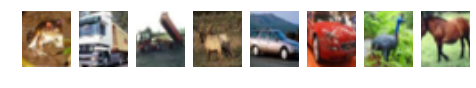

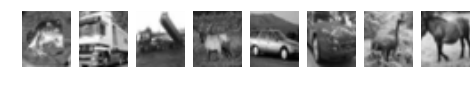

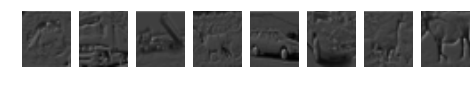

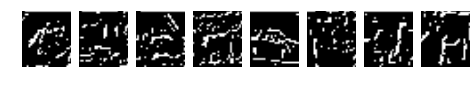

In [20]:
### test CIFAR-10 dataset ###
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import cPickle
def getCIFAR10(i):
    return unpickle('/Volumes/DATA/work/Scholar/cifar-10-batches-py/data_batch_'+i)
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict
###### perceived lumination filter test with Lateral Inhibition #######
def luminance(x): # x is a numpy narray
    return x.dot([0.299, 0.587, 0.114])
def runBinarization(x, r, ratio):
    y = np.zeros(x.shape)
    for i in xrange(x.shape[0]):
        for j in xrange(x.shape[1]):
            s = 0
            t = 0
            for k in xrange(max(0,i-r),min(x.shape[0],i+r)):
                for h in xrange(max(0,j-r),min(x.shape[1],j+r)):
                    t += 1.0
                    if x[i][j][0] > x[k][h][0]:
                        s += 1.0
            if s/t >= ratio:
                y[i][j][:] = 1.0
            else:
                y[i][j][:] = 0.0
    return y
def runLuminanceFilter(x):
    y = np.zeros(x.shape)
    x = luminance(x)
    for i in xrange(y.shape[0]):
        for j in xrange(y.shape[1]):
            y[i][j][:] = x[i][j]
    return y
def runLateralInhibition(x, r): # r is radius for a neighbor definition
    y = np.zeros(x.shape)
    for i in xrange(x.shape[0]):
        for j in xrange(x.shape[1]):
            s = 0
            for k in xrange(max(0,i-r),min(i+r,x.shape[0])):
                for h in xrange(max(0,j-r),min(j+r,x.shape[1])):
                    s += x[k][h][0]
            if s > 0:
                y[i][j][:] = x[i][j][0]/max(1.0,s)
            else:
                y[i][j][:] = 0
    return y
data = getCIFAR10('1')
im = np.zeros([8,32,32,3])
for iid in xrange(8):
    for i in xrange(32):
        for k in xrange(32):
            im[iid][i][k][0] = data['data'][iid][(i*32+k)]/255.0
            im[iid][i][k][1] = data['data'][iid][1024+(i*32+k)]/255.0
            im[iid][i][k][2] = data['data'][iid][2048+(i*32+k)]/255.0
# show original images
f, axs = plt.subplots(1, 8, sharey=True,figsize=(8,1))
for iid in xrange(8):
    axs[iid].axis('off')
    axs[iid].imshow(im[iid])
# show filtered images
im1 = np.zeros(im.shape)
f1, axs1 = plt.subplots(1, 8, sharey=True,figsize=(8,1))
for iid in xrange(8):
    im1[iid] = runLuminanceFilter(im[iid])
    axs1[iid].axis('off')
    axs1[iid].imshow(im1[iid])
# show lateral inhibition images
im2 = np.zeros(im1.shape)
f2, axs2 = plt.subplots(1, 8, sharey=True,figsize=(8,1))
for iid in xrange(8):
    im2[iid] = runLateralInhibition(im1[iid],1)
    axs2[iid].axis('off')
    axs2[iid].imshow(im2[iid])
# show binarized images
im3 = np.zeros(im2.shape)
f3, axs3 = plt.subplots(1, 8, sharey=True,figsize=(8,1))
for iid in xrange(8):
    im3[iid] = runBinarization(im2[iid], 10, 0.85)
    axs3[iid].axis('off')
    axs3[iid].imshow(im3[iid])

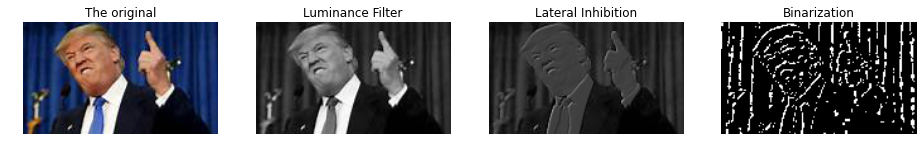

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
###### perceived lumination filter test with Lateral Inhibition #######
def luminance(x): # x is a numpy narray
    return x.dot([0.299, 0.587, 0.114])
def runBinarization(x, r, ratio):
    y = np.zeros(x.shape)
    for i in xrange(x.shape[0]):
        for j in xrange(x.shape[1]):
            s = 0
            t = 0
            for k in xrange(max(0,i-r),min(x.shape[0],i+r)):
                for h in xrange(max(0,j-r),min(x.shape[1],j+r)):
                    t += 1.0
                    if x[i][j][0] > x[k][h][0]:
                        s += 1.0
            if s/t >= ratio:
                y[i][j][:] = 1.0
            else:
                y[i][j][:] = 0.0
    return y
def runLuminanceFilter(x):
    y = np.zeros(x.shape)
    x = luminance(x)
    for i in xrange(y.shape[0]):
        for j in xrange(y.shape[1]):
            y[i][j][:] = x[i][j]
    return y
def runLateralInhibition(x, r): # r is radius for a neighbor definition
    y = np.zeros(x.shape)
    for i in xrange(x.shape[0]):
        for j in xrange(x.shape[1]):
            s = 0
            for k in xrange(max(0,i-r),min(i+r,x.shape[0])):
                for h in xrange(max(0,j-r),min(j+r,x.shape[1])):
                    s += x[k][h][0]
            if s > 0:
                y[i][j][:] = x[i][j][0]/max(1.0,s)
            else:
                y[i][j][:] = 0
    return y

im = image.imread('/Volumes/DATA/work/Scholar/trump.png')
s = [0,1,3]
s[0] = im.shape[0]
s[1] = im.shape[1]
im1 = np.zeros(s)
for i in xrange(s[0]):
    for j in xrange(s[1]):
        for k in xrange(s[2]):
            im1[i][j][k] = im[i][j][k]
########### test filter and inhibition
im1 = runLuminanceFilter(im1)
im2 = runLateralInhibition(im1,1)
im3 = runBinarization(im2,5,0.85)
f1,axs=plt.subplots(1,4,sharey=True,figsize=(16,2))
axs[0].axis('off')
axs[0].imshow(im)
axs[0].set_title('The original')
axs[1].axis('off')
axs[1].imshow(im1)
axs[1].set_title('Luminance Filter')
axs[2].axis('off')
axs[2].imshow(im2)
axs[2].set_title('Lateral Inhibition')
axs[3].axis('off')
axs[3].imshow(im3)
axs[3].set_title('Binarization')

### Construct luminance filter
$$\mathcal{F}(\cdot)=(r,g,b)\cdot(0.299,0.587,0.114)$$

### Apply lateral inhibition
$$\Upsilon=\{\mathcal{N}_{(x,y)}\mid|x-x_0|+|y-y_0|\le r\}$$
\begin{equation}
x_i' = \frac{x_i}{\max(1.0,\sum_{x_k\in{\Upsilon}}(x_k))}
\end{equation}

### Binarization of feature maps
\begin{equation}
x_i'' =\left\{
\begin{aligned}
    1.0,&& \frac{\text{count}(\{{x_k'}\mid{x_i'}-{x_k'}>\beta\})}{\text{count}(\Upsilon)}\ge\theta \\
    0.0,&& otherwise\\
\end{aligned}
\right.
\end{equation}